#Connect to Google Drive
We will work our dataset and files through google drive and take the absolute paths through our Google drive account

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


Now lets import the libraries we will need for our code.

In [4]:
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import tensorflow as tf

import numpy as np
from tensorflow.keras.callbacks import TensorBoard, Callback
from keras.callbacks import ModelCheckpoint  
import matplotlib.pyplot as plt
from tqdm import tqdm

import time
import cv2
import os

# For Visualiztion
import seaborn as sns
import matplotlib.cm as cm

# Creating our Dataset
Our original dataset is a folder where its subfolders are its dog breed with the corresponding images inside.

We will break this dataset into three separate datasets for training validation and testing.

**dog_names** variable is a list of our dog labels and also the name of each subfolder in the original dataset. Thus, using the dog_names variable we will create all the subfolder dog breeds for the train/validation/test dataset.

In [ ]:
dog_names = [item[31:-1] for item in sorted(glob("/content/gdrive/MyDrive/Images/*/"))]
dog_names

train_dir_2 = '/content/gdrive/MyDrive/dogimages2/train2/'  # parent directoiry of the training set
test_dir_2 = '/content/gdrive/MyDrive/dogimages2/test2/'  # parent directory of the validation set
valid_dir_2 = '/content/gdrive/MyDrive/dogimages2/valid2/'  # parent directory of the test set

os.mkdir(train_dir_2)
os.mkdir(test_dir_2)
os.mkdir(valid_dir_2)

for sub_dir in dog_names:
    os.mkdir(train_dir_2+sub_dir)
    os.mkdir(test_dir_2+sub_dir)
    os.mkdir(valid_dir_2+sub_dir)

# Dataset split into the Train - Validation - Test
We will split our images into 80% for training , 10% for validation and 10% for testing.

In [ ]:
import shutil

test_split = 0.1
valid_split = 0.1

# Track the final sizes of each dataset
train_size = 0
valid_size = 0
test_size = 0
directory= '/content/gdrive/MyDrive/Images'

# loop over the images for each breed and using probabilities assign each image to one of the 3 sets
#In the end each dog breed's images will be split 80% of the images for training, 10% for validation in the model and 10% for later testing.
for category in dog_names:
    path = os.path.join(directory,category)
    for img in os.listdir(path):
        imgpath = os.path.join(path, img)
        rnd_prob = np.random.rand()  # give the current image a random number in the range [0, 1]
        if rnd_prob <= test_split: 
            shutil.copy(imgpath, test_dir_2+'/'+category) 
            test_size += 1            
        elif rnd_prob <= (test_split + valid_split):
            shutil.copy(imgpath, valid_dir_2+'/'+category)
            valid_size += 1 
        else:
            shutil.copy(imgpath, train_dir_2+'/'+category)
            train_size += 1

print(train_size, valid_size, test_size)

16411 2075 2094


In [148]:
dog_names = [item[42:-1] for item in sorted(glob("/content/gdrive/MyDrive/dogimages2/train2/*/"))]

dog_names

['n02085620-Chihuahua',
 'n02085782-Japanese_spaniel',
 'n02085936-Maltese_dog',
 'n02086079-Pekinese',
 'n02086240-Shih-Tzu',
 'n02086646-Blenheim_spaniel',
 'n02086910-papillon',
 'n02087046-toy_terrier',
 'n02087394-Rhodesian_ridgeback',
 'n02088094-Afghan_hound',
 'n02088238-basset',
 'n02088364-beagle',
 'n02088466-bloodhound',
 'n02088632-bluetick',
 'n02089078-black-and-tan_coonhound',
 'n02089867-Walker_hound',
 'n02089973-English_foxhound',
 'n02090379-redbone',
 'n02090622-borzoi',
 'n02090721-Irish_wolfhound',
 'n02091032-Italian_greyhound',
 'n02091134-whippet',
 'n02091244-Ibizan_hound',
 'n02091467-Norwegian_elkhound',
 'n02091635-otterhound',
 'n02091831-Saluki',
 'n02092002-Scottish_deerhound',
 'n02092339-Weimaraner',
 'n02093256-Staffordshire_bullterrier',
 'n02093428-American_Staffordshire_terrier',
 'n02093647-Bedlington_terrier',
 'n02093754-Border_terrier',
 'n02093859-Kerry_blue_terrier',
 'n02093991-Irish_terrier',
 'n02094114-Norfolk_terrier',
 'n02094258-Norwi

In [149]:
DicList = {k: v for v, k in enumerate(dog_names)}
DicList

{'n02085620-Chihuahua': 0,
 'n02085782-Japanese_spaniel': 1,
 'n02085936-Maltese_dog': 2,
 'n02086079-Pekinese': 3,
 'n02086240-Shih-Tzu': 4,
 'n02086646-Blenheim_spaniel': 5,
 'n02086910-papillon': 6,
 'n02087046-toy_terrier': 7,
 'n02087394-Rhodesian_ridgeback': 8,
 'n02088094-Afghan_hound': 9,
 'n02088238-basset': 10,
 'n02088364-beagle': 11,
 'n02088466-bloodhound': 12,
 'n02088632-bluetick': 13,
 'n02089078-black-and-tan_coonhound': 14,
 'n02089867-Walker_hound': 15,
 'n02089973-English_foxhound': 16,
 'n02090379-redbone': 17,
 'n02090622-borzoi': 18,
 'n02090721-Irish_wolfhound': 19,
 'n02091032-Italian_greyhound': 20,
 'n02091134-whippet': 21,
 'n02091244-Ibizan_hound': 22,
 'n02091467-Norwegian_elkhound': 23,
 'n02091635-otterhound': 24,
 'n02091831-Saluki': 25,
 'n02092002-Scottish_deerhound': 26,
 'n02092339-Weimaraner': 27,
 'n02093256-Staffordshire_bullterrier': 28,
 'n02093428-American_Staffordshire_terrier': 29,
 'n02093647-Bedlington_terrier': 30,
 'n02093754-Border_terr

Let's show the first image of the training dataset

   


n02085620-Chihuahua


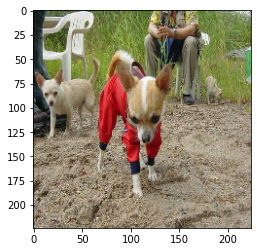

In [5]:
DATADIR = "/content/gdrive/MyDrive/dogimages2/train2/"
dog_names
IMG_SIZE = 224
for category in dog_names:
    path = os.path.join(DATADIR, category) # path to cats or dogs dir
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_COLOR)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        img_array_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        img_array_resized = cv2.normalize(img_array_resized, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
        plt.imshow(img_array_resized,cmap="gray")
        print(category)
        plt.show()
        break
    break

#Image Preprocessing

We will read each image from the corresponding dataset and it's label and append it to the below three lists.

*   `Train_data2`
*   `Test_data2`
*   `Valid_data2`

`CV2` library will help us read each image, convert it and resize it to our needs.<br>
`os.path.join` & `os.listdir` functions will assist us in iterating through each image from each folder and each dataset.

We will read the Images as RGB and image size 224x224.<br>
The final image will be a 4D Tensor with shape **(1 ,224 ,224 ,3)**

Each of our lists will have images of shape **(nb of images, 224, 224, 3)** and the corresponding **label** of the 4D Tensor







In [7]:
# Define directory where data is 
DATADIR = ["/content/gdrive/MyDrive/dogimages2/train2","/content/gdrive/MyDrive/dogimages2/valid2","/content/gdrive/MyDrive/dogimages2/test2"]
dog_names

# Define categories
Train_data2 = []
Test_data2 = []
Valid_data2 = []

# Load data
IMG_SIZE = 224

for directory in DATADIR:
  for category in dog_names:
    path = os.path.join(directory,category)# path to dogs breeds dir
    delta = category
    label = DicList[delta] # define label for dog breed
    for img in os.listdir(path):
      img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR) 
      img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
      img_array_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) # resize image as IMG_SIZE X IMG_SIZE pixels X (1 for grayscale or 3 for color)
      #img_array_resized = cv2.normalize(img_array_resized, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
      if directory == "/content/gdrive/MyDrive/dogimages2/train2":
        Train_data2.append([img_array_resized,label])
      elif directory == "/content/gdrive/MyDrive/dogimages2/valid2":
        Valid_data2.append([img_array_resized,label])
      elif directory == "/content/gdrive/MyDrive/dogimages2/test2":
        Test_data2.append([img_array_resized,label])  

Each one of the three lists will be broken into two numpy arrays. One array for our Tensors and the other array will be the corresponding image labels.

We will shuffle our lists before proceeding in order for our models not to learn any patterns of image label placements.

In [8]:
import random
random.shuffle(Train_data2)
random.shuffle(Valid_data2)

x_train = []
y_train = []

x_valid = []
y_valid = []

for features , label in Train_data2:
  x_train.append(features)
  y_train.append(label)

for features , label in Valid_data2:
  x_valid.append(features)
  y_valid.append(label)


x_train = np.array(x_train).reshape(-1, IMG_SIZE , IMG_SIZE,3)
y_train = np.array(y_train)

x_valid = np.array(x_valid).reshape(-1, IMG_SIZE , IMG_SIZE,3)
y_valid = np.array(y_valid)

In [9]:
import random
random.shuffle(Test_data2)


x_test = []
y_test = []


for features , label in Test_data2:
  x_test.append(features)
  y_test.append(label)

x_test = np.array(x_test).reshape(-1, IMG_SIZE , IMG_SIZE,3)
y_test = np.array(y_test)

In [40]:
print(x_train.shape)
print(x_valid.shape)
print(x_test.shape)

(16411, 224, 224, 3)
(2075, 224, 224, 3)
(2094, 224, 224, 3)


# Dataframe Creation
We will create a dataframe with rows for each dog breed and the count the images which correspond in each breed.

The reason for that is to run plots and aggregation in order to understand the structure of our data and make sure we do not have imbalanced classes.

In [7]:
# Define directory where data is 
DATADIR = ["/content/gdrive/MyDrive/Images"]
dog_names

# Define categories
images = []

# Load data
IMG_SIZE = 224

for directory in DATADIR:
  for category in dog_names:
    path = os.path.join(directory,category)# path to dogs breeds dir
    delta = category
    label = DicList[delta] # define label for dog breed
    for img in os.listdir(path):
        images.append(label)

In [34]:
df = pd.DataFrame(images, columns= ["DogIDCount",])
df_2 = df.groupby(['DogIDCount']).agg({'DogIDCount': 'count',})
df_2.index.name = 'DogID'
df_2 = df_2.reset_index()
df_2

for i in range(len(df_2)):
    dog_names = list(DicList.keys())[list(DicList.values()).index(i)]
    df_2.loc[i,"DogName"] = dog_names
df_2



,DogID,DogIDCount,DogName
0,0,152,n02085620-Chihuahua
1,1,185,n02085782-Japanese_spaniel
2,2,252,n02085936-Maltese_dog
3,3,149,n02086079-Pekinese
4,4,214,n02086240-Shih-Tzu
...,...,...,...
115,115,159,n02113799-standard_poodle
116,116,155,n02113978-Mexican_hairless
117,117,156,n02115641-dingo
118,118,150,n02115913-dhole


In [13]:
Avg_Images = df_2["DogIDCount"].mean()
Total_Images = df_2["DogIDCount"].sum()
Std_Images = df_2["DogIDCount"].std()


print("There are {} Images in our dataset and {} Images per class with a Standard Deviation of {}".format(Total_Images, Avg_Images,round(Std_Images)))

There are 20580 Images in our dataset and 171.5 Images per class with a Standard Deviation of 23


#Images Show
###Lets plot a few images to see what kind of data we are dealing with

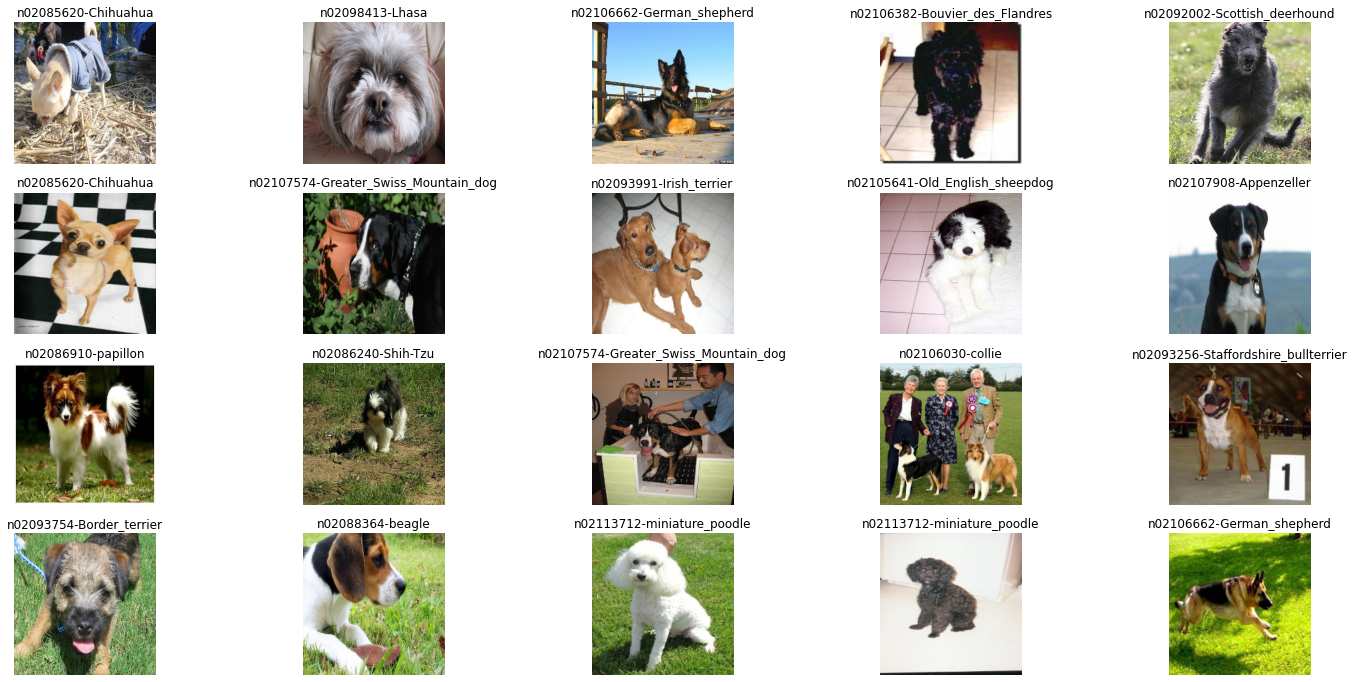

In [39]:
plt.figure(figsize=(25, 12))
for i in range(20):
  ax = plt.subplot(4, 5, i+1)
  plt.imshow(x_valid[i])
  plt.title(list(DicList.keys())[list(DicList.values()).index(y_valid[i])])
  plt.axis("off")

In [47]:
def plot_dogs(DogDF):
    df = pd.DataFrame(DogDF, columns= ["DogID",])
    for i in range(len(df)):
        j = df.loc[i,"DogID"]
        dog_name = list(DicList.keys())[list(DicList.values()).index(j)]
        df.loc[i,"DogID"] = dog_name
    

    fig, ax = plt.subplots(figsize=(10,12))
    df["DogID"].value_counts().nlargest(50).plot(ax=ax, kind='barh',).invert_yaxis()
    ax.set_title('Distribution of Dog Names')

In [160]:
list(DicList.keys())[list(DicList.values()).index(15)]

'n02089867-Walker_hound'

# Dog Breed Distribution

##We will look over the top 50 breeds. As it can be seen by the Plot below the distribution is almost uniformal and there are no Imbalanced classes. <br>
##There are 20.580 Dog Images over 120 classes and on average each class consists of 171 images.

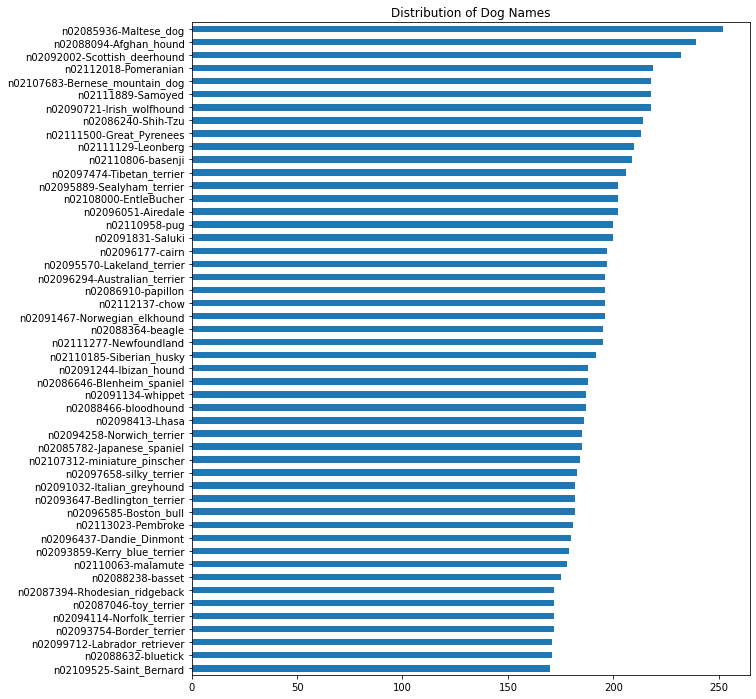

In [48]:
plot_dogs(images)

# Dog detection

####Before proceeding with the dog breed recognition models we will create a dog detector. The idea is to build a pipeline where the image will go through the dog detector, understand that there is a dog in the picture and then try to identify what kind of breed it is.





##ResNet50 as Dog detector

###We will read our images through the function below like we did earlier with the `CV2` library and feed those Tensors into the ResNet50 pretrained model. 

In [209]:
# Define directory where data is

def TensorMF(img_path):
    IMG_SIZE = 224
    img_array = cv2.imread(img_path ,cv2.IMREAD_COLOR)
    img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
    img_array_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) # resize image as IMG_SIZE X IMG_SIZE pixels X (1 for grayscale or 3 for color)
    Tensor = np.array(img_array_resized).reshape(-1, IMG_SIZE , IMG_SIZE,3)
    return Tensor


#Dog Detector Function
####Our function will receive a 4D Tensor which will be fed for prediction into the ResNet50 model.<br>
####After going through the documentation of the ResNet50 model the prediction values between 151 - 268 consist of dog like predictions. Thus our prediction output should fall between those numbers.<br>
####ResNet50 model will try to identify from the pretrained classes it had what kind of breed the dog image is however, we do not care if it finds the correct breed but, to understand that it looks like the other dog breeds resnet has so it will be forced to predict the image into that area of predictions and not something else.


In [210]:
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.applications import ResNet50

# define ResNet50 model
ResNet50_model = ResNet50(weights='imagenet')

def dog_detector(img_path):
    # returns prediction vector for image located at img_path
    img = preprocess_input(TensorMF(img_path))
    prediction = np.argmax(ResNet50_model.predict(img))
    return ((prediction <= 268) & (prediction >= 151)) 

In [ ]:
directory = '/content/gdrive/MyDrive/Images'
c = 0 #Lets count all the images the dog detector function predicted as a dog


for category in os.listdir(directory):

  path = os.path.join(directory,category)
  for images in os.listdir(path):
    img_path = os.path.join(path,images)
    try:
      if dog_detector(img_path) == True:
        c+=1
    except:
      pass
              
print(c)


19900


In [ ]:
print("The Accuracy of the Dog Detector was {}%".format("{:.2f}".format(c/Total_Images*100)))

The Accuracy of the Dog Detector was 96.70%


In [ ]:
#Lets save some ram here since we dont need those anymore.
del(Train_data2)
del(Valid_data2)
del(Test_data2)


In [52]:
#We will call the ClearMemory function after each epoch in order to have more room in our RAM
from tensorflow.keras import backend as k
from tensorflow.keras.callbacks import TensorBoard, Callback
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import gc 

class ClearMemory(Callback):
    def on_epoch_end(self, epoch, logs=None):
        gc.collect()
        k.clear_session()

#CNN Model from Scratch
####We used for loops in order to try out different models and find the best parameters for the model. More than 90 different combinations of parameters were given.<br>
####CNN models are considered the best neural network architectures for image recognition.<br>
####Validation loss and Validation Accuracy metrics were used in order to find the most efficient model.

In [ ]:
import time
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense, Rescaling, Activation,BatchNormalization
from keras.models import Sequential
from tensorflow import keras
from keras.callbacks import ModelCheckpoint  
from tensorflow.keras import layers


dense_layers = [0]
layer_sizes = [128]
conv_layers = [3]
p_sizes= [4]
c_sizes = [2]


for dense_layer in dense_layers:
  for layer_size in layer_sizes:
    for conv_layer in conv_layers:
      for c_size in c_sizes:
        for p_size in p_sizes:

          gc.collect()
          NAME = "{}-conv-{}-c_size-{}-p_size-{}-nodes-{}-dense-{}".format(conv_layer,c_size,p_size, layer_size, dense_layer,int(time.time()))
          tensorboard = TensorBoard(log_dir= '/content/gdrive/MyDrive/logs3/{}'.format(NAME))
          print(NAME)

          Mymodel = Sequential()
          Mymodel.add(Rescaling(1./255.0, input_shape=(IMG_SIZE, IMG_SIZE, 3)))
          Mymodel.add(Conv2D(layer_size, (c_size,c_size)))
          Mymodel.add(Activation("relu"))
          Mymodel.add(BatchNormalization())
          Mymodel.add(MaxPooling2D(pool_size=p_size))

          for l in range(conv_layer-1):
            Mymodel.add(Conv2D(filters=layer_size, kernel_size= c_size , padding='same' ,))
            Mymodel.add(Activation("relu"))
            Mymodel.add(BatchNormalization())
            Mymodel.add(MaxPooling2D(pool_size=p_size))
            Mymodel.add(Dropout(0.3))

          Mymodel.add(Flatten())
          for l in range(dense_layer):
            Mymodel.add(Dense(layer_size))
            Mymodel.add(Activation("relu"))
            Mymodel.add(Dropout(0.3))

          Mymodel.add(BatchNormalization())
          Mymodel.add(Dense(120, activation='Softmax'))

          Mymodel.compile(loss="sparse_categorical_crossentropy",optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-3),metrics=["accuracy"])


          checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.from_scratch.hdf5',verbose=1, save_best_only=True)

          Mymodel.summary()

          hist = Mymodel.fit(x_train, y_train , batch_size=32, validation_data=(x_valid,y_valid), epochs = 20, verbose = 1, callbacks=[ClearMemory(),tensorboard,checkpointer])
          



3-conv-2-c_size-4-p_size-128-nodes-0-dense-1662162543
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 223, 223, 128)     1664      
                                                                 
 activation (Activation)     (None, 223, 223, 128)     0         
                                                                 
 batch_normalization (BatchN  (None, 223, 223, 128)    512       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 55, 55, 128)      0         
 )                                                               
                                                                 
 c

513/513 [==============================] - ETA: 0s - loss: 4.9056 - accuracy: 0.0351
Epoch 1: val_loss improved from inf to 4.81640, saving model to saved_models/weights.best.from_scratch.hdf5
513/513 [==============================] - 48s 68ms/step - loss: 4.9056 - accuracy: 0.0351 - val_loss: 4.8164 - val_accuracy: 0.0304
Epoch 2/20
513/513 [==============================] - ETA: 0s - loss: 4.3830 - accuracy: 0.0706
Epoch 2: val_loss improved from 4.81640 to 4.31819, saving model to saved_models/weights.best.from_scratch.hdf5
513/513 [==============================] - 34s 66ms/step - loss: 4.3830 - accuracy: 0.0706 - val_loss: 4.3182 - val_accuracy: 0.0752
Epoch 3/20
513/513 [==============================] - ETA: 0s - loss: 4.1017 - accuracy: 0.1008
Epoch 3: val_loss improved from 4.31819 to 4.20319, saving model to saved_models/weights.best.from_scratch.hdf5
513/513 [==============================] - 34s 66ms/step - loss: 4.1017 - accuracy: 0.1008 - val_loss: 4.2032 - val_accuracy:

In [ ]:
Mymodel.save('/content/gdrive/MyDrive/mymodel3.hdf5')


In [42]:
from tensorflow import keras
Mymodel = keras.models.load_model('/content/gdrive/MyDrive/mymodel3.hdf5')

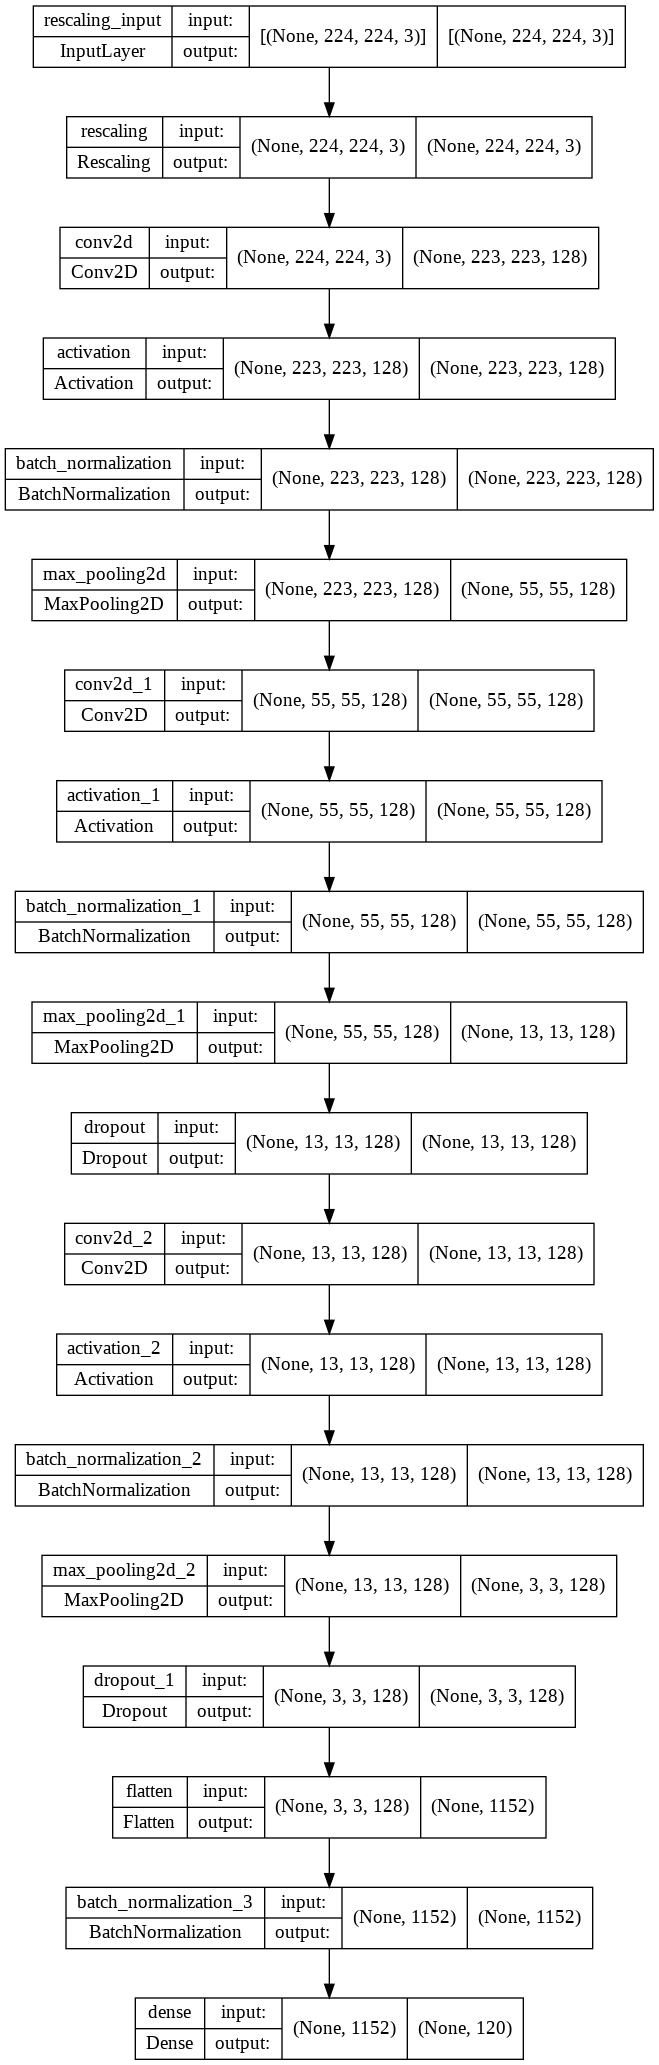

In [44]:
from keras.utils.vis_utils import plot_model
plot_model(Mymodel, to_file='/content/gdrive/MyDrive/Mymodel3_plot.png', show_shapes=True, show_layer_names=True)

#Model Metrics and Predictions
####Our CNN Model achieved an out of sample and validation accuracy of 20%.


In [ ]:
Mymodel_predictions = [np.argmax(Mymodel.predict(np.expand_dims(feature, axis=0))) for feature in x_test]
sum(Mymodel_predictions == y_test)/y_test.shape[0]

0.20773638968481375

#Model Accuracy Plot
####Below we plotted the train and validation Accuracy of the model per epoch. 

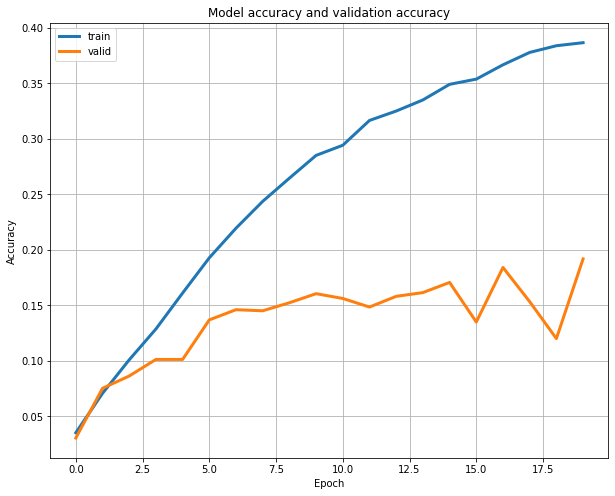

In [ ]:
## plot the accuracy history for train and valid dataset
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

plt.figure(figsize=(10,8))
plt.plot(acc, linewidth=3 , label="train")
plt.plot(val_acc, linewidth=3 , label="valid")

plt.legend(['train','valid'], loc='upper left')
plt.grid()
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Model accuracy and validation accuracy')
plt.show()

# VGG16 Pretrained Model

####We will use the VGG16 pretrained model in order to get even higher out of sample accuracy. We used 3  Dense layers before the Final Dense layer output.
####For an unknown reason the VGG16 Model learnt much better on non-normalised tensors (Pixels varied between 0 - 255) than on normalised data. The out of sample accuracy on the Rescaled [0,1] images was around 30% while, on the the out of sample accuracy on non-normalised tensors was 50%.

In [ ]:
#VGG16
from keras.applications.vgg16 import VGG16, preprocess_input
import time
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense, Rescaling, Activation,BatchNormalization
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint  
from tensorflow import keras
from tensorflow.keras import layers

#Loading the vgg16 model with pre-trained ImageNet weights
NAME = "VGG16-{}".format(int(time.time()))
tensorboard = TensorBoard(log_dir= '/content/gdrive/MyDrive/logs3/{}'.format(NAME))
print(NAME)


VGG_model = VGG16(weights="imagenet", include_top=False,input_shape=(IMG_SIZE, IMG_SIZE, 3))

for layer in VGG_model.layers:
        layer.trainable = False


VGG16_model = Sequential()
#model.add(Rescaling(1./255.0, input_shape=(IMG_SIZE, IMG_SIZE, 3))) with rescaling we have 30% validation accuracy
VGG16_model.add(VGG_model)
VGG16_model.add(MaxPooling2D(pool_size=[2, 2], strides=[1, 1], padding='same'))

VGG16_model.add(BatchNormalization())
VGG16_model.add(Flatten())
VGG16_model.add(Dense(512, activation = 'relu'))
VGG16_model.add(BatchNormalization())
VGG16_model.add(Dropout(0.40))

VGG16_model.add(Dense(512, activation = 'relu'))
VGG16_model.add(BatchNormalization())
VGG16_model.add(Dropout(0.40))

VGG16_model.add(Dense(2048, activation = 'relu'))
VGG16_model.add(BatchNormalization())
VGG16_model.add(Dropout(0.40))



VGG16_model.add(Dense(120, activation='softmax'))

VGG16_model.compile(loss="sparse_categorical_crossentropy",optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-3),metrics=["accuracy"])


checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.from_scratch.hdf5',verbose=1, save_best_only=True)

VGG16_model.summary()

hist = VGG16_model.fit(x_train, y_train, batch_size=32, validation_data=(x_valid,y_valid) , epochs =25, verbose = 1, callbacks=[ClearMemory(),tensorboard,checkpointer])
          




VGG16-1662164106
58900480/58889256 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 max_pooling2d (MaxPooling2D  (None, 7, 7, 512)        0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 7, 7, 512)        2048      
 ormalization)                                                   
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 512)               12845568  
                                        

In [ ]:
VGG16_model.save('/content/gdrive/MyDrive/mymodel/VGG16_Model.hdf5')


#VGG16 Plot
###We can see that right after the 5th epoch the VGG16 Model started to overfit and tried to remember each image instead of learning from it.

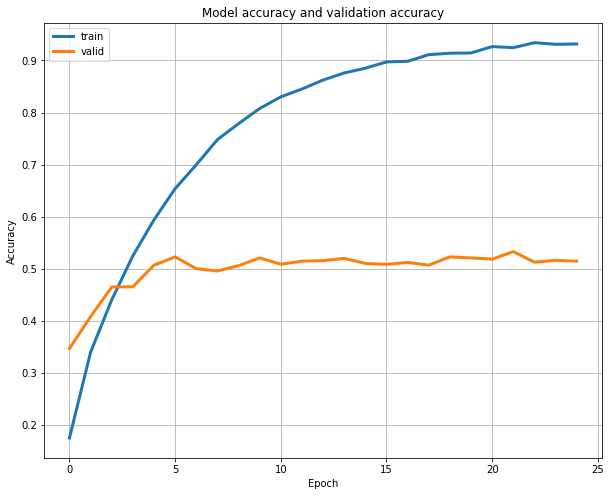

In [ ]:
## plot the accuracy history for the train and validation datasets
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

plt.figure(figsize=(10,8))
plt.grid()
plt.plot(acc, linewidth=3 , label="train")
plt.plot(val_acc, linewidth=3 , label="valid")
plt.legend(['train','valid'], loc='upper left')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Model accuracy and validation accuracy')
plt.show()

###VGG16 Prediction had an accuracy of 51% on the Test Dataset.


In [ ]:
VGG16_model_predictions = [np.argmax(VGG16_model.predict(np.expand_dims(feature, axis=0))) for feature in x_test]
sum(VGG16_model_predictions == y_test)/y_test.shape[0]

0.5109837631327603

#Xception Pretrained Model.
####Due to memory limitations we will not try to load all the 20k images in our memory we will load them in batches and feed them in batches in to the Xception model. <br>
####`ImageDataGenerator` & `flow_from_directory` functions from Tensorflow library will help us read the images in batches rescale and resize them. Furthermore, our dataset structure is such that `flow_from_directory` function will understand by itself the labels or our images.

In [46]:
train_data_dir = '/content/gdrive/MyDrive/dogimages2/train2'
validation_data_dir = '/content/gdrive/MyDrive/dogimages2/valid2'
test_data_dir = '/content/gdrive/MyDrive/dogimages2/test2'

batch_size = 32

In [47]:
from keras.layers import Input
from keras.applications import xception
from keras.preprocessing import image
import time
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense, Rescaling, Activation,BatchNormalization
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint  
from tensorflow import keras
from tensorflow.keras import layers

#Load the pretrained Xception model with the weights of Imagenet.

base_model = xception.Xception(weights='imagenet',
                          include_top=False,
                          input_shape=(224, 224, 3),
                          pooling='avg')

data_generator = image.ImageDataGenerator(rescale = 1./255)

val_generator = image.ImageDataGenerator(rescale = 1./255)



train_generator = data_generator.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode=None,
    shuffle=False,)


validation_generator = val_generator.flow_from_directory(
    validation_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode=None,
    shuffle=False,)

test_generator = val_generator.flow_from_directory(
    test_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode=None,
    shuffle=False,)


83697664/83683744 [==============================] - 1s 0us/step
Found 16411 images belonging to 120 classes.
Found 2075 images belonging to 120 classes.
Found 2094 images belonging to 120 classes.


#Bottleneck Feature Extraction
####The Xception model will extract the features of each 4D Tensor and feed those into the main model. By doing so we will largely reduce the training time.

In [ ]:
bottleneck_features_train = base_model.predict_generator(train_generator, 16411 / batch_size, verbose = 1)
bottleneck_features_validation = base_model.predict_generator(validation_generator, 2075 / batch_size,verbose = 1)
bottleneck_features_test = base_model.predict_generator(test_generator, 2094 / batch_size,verbose = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


512/512 [==============================] - 71s 137ms/step


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


64/64 [==============================] - 9s 137ms/step


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


65/65 [==============================] - 9s 144ms/step


In [ ]:
#Lets save the features for future use.
np.save(open('/content/gdrive/MyDrive/Bottlenecks/Xception_bottleneck_features_train.npy', 'wb'),bottleneck_features_train)
np.save(open('/content/gdrive/MyDrive/Bottlenecks/Xception_bottleneck_features_validation.npy', 'wb'),bottleneck_features_validation)
np.save(open('/content/gdrive/MyDrive/Bottlenecks/Xception_bottleneck_features_test.npy', 'wb'),bottleneck_features_test)

In [48]:
train_data = np.load(open('/content/gdrive/MyDrive/Bottlenecks/Xception_bottleneck_features_train.npy', 'rb'))
valid_data = np.load(open('/content/gdrive/MyDrive/Bottlenecks/Xception_bottleneck_features_validation.npy', 'rb'))
train_targets = train_generator.classes
valid_targets = validation_generator.classes

# Dataset Shuffling.
####In order to avoid the model keeping patterns of the dataset construction we will randomly shuffle our 4D Tensors and their Labels. Keep in mind that the shuffle applied had to be the same on the Tensors and Labels.

In [49]:
indices = np.arange(train_data.shape[0])
np.random.shuffle(indices)

train_data = train_data[indices]
train_targets = train_targets[indices]

In [50]:
indices = np.arange(valid_data.shape[0])
np.random.shuffle(indices)

valid_data = valid_data[indices]
valid_targets = valid_targets[indices]

In [53]:
#Xception model
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D,GlobalAveragePooling3D
from keras.layers import Dropout, Flatten, Dense, Rescaling, Activation,BatchNormalization
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint  
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dropout, Dense
NAME = "xception-{}".format(int(time.time()))
tensorboard = TensorBoard(log_dir= '/content/gdrive/MyDrive/logs3/{}'.format(NAME))
print(NAME)


Xception_model = Sequential()


Xception_model.add(Flatten())
Xception_model.add(Dense(256, activation='relu',input_shape= base_model.output_shape[1:] ))
Xception_model.add(BatchNormalization())
Xception_model.add(Dropout(0.4))
Xception_model.add(Dense(256, activation='relu', name= 'My_Dense'))
Xception_model.add(BatchNormalization())
Xception_model.add(Dropout(0.4))



Xception_model.add(Dense(120, activation='softmax'))

Xception_model.compile(loss="sparse_categorical_crossentropy",optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-3),metrics=["accuracy"])


checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.from_scratch.hdf5',verbose=1, save_best_only=True)


        

history = Xception_model.fit(train_data, train_targets,
                    epochs=25,
                    verbose=1,
                    batch_size = 32,
                    callbacks=[ClearMemory(),tensorboard,checkpointer],
                    validation_data=(valid_data,valid_targets))

xception-1662314522
Epoch 1/25
507/513 [============================>.] - ETA: 0s - loss: 1.6752 - accuracy: 0.5992
Epoch 1: val_loss improved from inf to 0.84278, saving model to saved_models/weights.best.from_scratch.hdf5
513/513 [==============================] - 7s 10ms/step - loss: 1.6702 - accuracy: 0.6003 - val_loss: 0.8428 - val_accuracy: 0.7639
Epoch 2/25
512/513 [============================>.] - ETA: 0s - loss: 1.0030 - accuracy: 0.7316
Epoch 2: val_loss improved from 0.84278 to 0.80709, saving model to saved_models/weights.best.from_scratch.hdf5
513/513 [==============================] - 4s 8ms/step - loss: 1.0027 - accuracy: 0.7316 - val_loss: 0.8071 - val_accuracy: 0.7716
Epoch 3/25
512/513 [============================>.] - ETA: 0s - loss: 0.8601 - accuracy: 0.7628
Epoch 3: val_loss improved from 0.80709 to 0.80052, saving model to saved_models/weights.best.from_scratch.hdf5
513/513 [==============================] - 4s 8ms/step - loss: 0.8597 - accuracy: 0.7629 - val_lo

In [54]:
Xception_model.summary()
Xception_model.save('/content/gdrive/MyDrive/mymodel/Xception_Model.hdf5')


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               524544    
                                                                 
 batch_normalization_6 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 My_Dense (Dense)            (None, 256)               65792     
                                                                 
 batch_normalization_7 (Batc  (None, 256)              1024      
 hNormalization)                                      

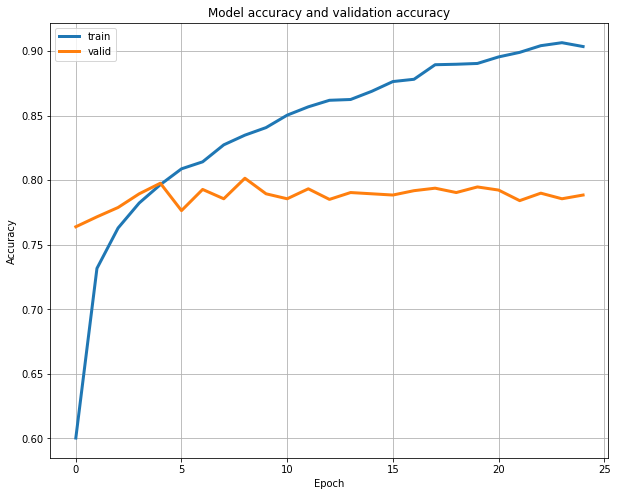

In [58]:
## plot the accuracy history for the train and validation datasets
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(10,8))
plt.grid()
plt.plot(acc, linewidth=3 , label="train")
plt.plot(val_acc, linewidth=3 , label="valid")
plt.legend(['train','valid'], loc='upper left')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Model accuracy and validation accuracy')
plt.show()

#Xception model Prediction & Accuracy
####We will load our final Xception Model and predict on the Test Dataset.
####The out of Sample Accuracy achieved was at 78.5%.

In [55]:
test_data = np.load(open('/content/gdrive/MyDrive/Bottlenecks/Xception_bottleneck_features_test.npy', 'rb'))
test_targets = test_generator.classes

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/gdrive/MyDrive/mymodel/Xception_Model.hdf5')

In [56]:
xcept_predictions = [np.argmax(Xception_model.predict(np.expand_dims(feature, axis=0))) for feature in test_data]

In [57]:
sum(xcept_predictions == test_targets)/test_targets.shape[0]

0.7808022922636103

#Inception_V3 Model 
###The same idea applied in the Xception model will be applied on the Inception_V3 Model.


1.   Read/Rescale/Resize our Datasets in Batches of 32 images per batch.
2.   Extract the features of the Images through the Inception_V3 Model.
3.   Feed the features into our Inception_V3_Model.
4.   Check the Results & Predictions.



In [66]:
from keras.layers import Input
from keras.applications import inception_v3
from keras.preprocessing import image
import time
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense, Rescaling, Activation,BatchNormalization
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint  
from tensorflow import keras
from tensorflow.keras import layers


IncV3_base_model = tf.keras.applications.inception_v3.InceptionV3(include_top=False, 
                                               weights='imagenet',pooling='avg',input_shape=(224, 224, 3))

data_generator = image.ImageDataGenerator(rescale = 1./255)

train_generator = data_generator.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode=None,
    shuffle=False,)


validation_generator = data_generator.flow_from_directory(
    validation_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode=None,
    shuffle=False,)

test_generator = data_generator.flow_from_directory(
    test_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode=None,
    shuffle=False,)

87924736/87910968 [==============================] - 1s 0us/step
Found 16411 images belonging to 120 classes.
Found 2075 images belonging to 120 classes.
Found 2094 images belonging to 120 classes.


In [ ]:
bottleneck_features_train = IncV3_base_model.predict_generator(train_generator, 16411 / batch_size, verbose = 1)
bottleneck_features_validation = IncV3_base_model.predict_generator(validation_generator, 2075 / batch_size ,verbose = 1)
bottleneck_features_test = IncV3_base_model.predict_generator(test_generator, 2094 / batch_size,verbose = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


64/64 [==============================] - 203s 3s/step


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


65/65 [==============================] - 604s 9s/step


In [ ]:
np.save(open('/content/gdrive/MyDrive/Bottlenecks/InceptV3_bottleneck_features_train.npy', 'wb'),bottleneck_features_train)
np.save(open('/content/gdrive/MyDrive/Bottlenecks/InceptV3_bottleneck_features_validation.npy', 'wb'),bottleneck_features_validation)
np.save(open('/content/gdrive/MyDrive/Bottlenecks/InceptV3_bottleneck_features_test.npy', 'wb'),bottleneck_features_test)

In [62]:
train_data = np.load(open('/content/gdrive/MyDrive/Bottlenecks/InceptV3_bottleneck_features_train.npy', 'rb'))
valid_data = np.load(open('/content/gdrive/MyDrive/Bottlenecks/InceptV3_bottleneck_features_validation.npy', 'rb'))
train_targets = train_generator.classes
valid_targets = validation_generator.classes

In [63]:
indices = np.arange(train_data.shape[0])
np.random.shuffle(indices)

train_data = train_data[indices]
train_targets = train_targets[indices]

In [64]:
indices = np.arange(valid_data.shape[0])
np.random.shuffle(indices)

valid_data = valid_data[indices]
valid_targets = valid_targets[indices]

In [67]:
#Inceptionv3 model
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D,GlobalAveragePooling3D
from keras.layers import Dropout, Flatten, Dense, Rescaling, Activation,BatchNormalization
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint  
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dropout, Dense
NAME = "InceptionV3-{}".format(int(time.time()))
tensorboard = TensorBoard(log_dir= '/content/gdrive/MyDrive/logs3/{}'.format(NAME))
print(NAME)


InceptionV3_model = Sequential()
#InceptionV3_model.add(MaxPooling2D(pool_size=[2, 2], strides=[1, 1], padding='same', ))

InceptionV3_model.add(Flatten())
InceptionV3_model.add(Dense(1024, activation='relu', input_shape= IncV3_base_model.output_shape[1:]))
InceptionV3_model.add(BatchNormalization())
InceptionV3_model.add(Dropout(0.4))
InceptionV3_model.add(Dense(128, activation='relu', name= 'My_Dense'))
InceptionV3_model.add(BatchNormalization())
InceptionV3_model.add(Dropout(0.4))



InceptionV3_model.add(Dense(120, activation='softmax'))

InceptionV3_model.compile(loss="sparse_categorical_crossentropy",optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-3),metrics=["accuracy"])


history = InceptionV3_model.fit(train_data,train_targets,
                    epochs=15,
                    verbose=1,
                    batch_size = 32,
                    callbacks=[ClearMemory(),tensorboard,],
                    validation_data=(valid_data,valid_targets))

InceptionV3-1662320814
Epoch 1/15
513/513 [==============================] - 12s 21ms/step - loss: 1.5015 - accuracy: 0.6610 - val_loss: 0.8404 - val_accuracy: 0.7610
Epoch 2/15
513/513 [==============================] - 11s 20ms/step - loss: 0.9047 - accuracy: 0.7617 - val_loss: 0.7997 - val_accuracy: 0.7730
Epoch 3/15
513/513 [==============================] - 10s 19ms/step - loss: 0.7974 - accuracy: 0.7803 - val_loss: 0.7446 - val_accuracy: 0.7918
Epoch 4/15
513/513 [==============================] - 10s 19ms/step - loss: 0.7290 - accuracy: 0.7971 - val_loss: 0.7319 - val_accuracy: 0.7928
Epoch 5/15
513/513 [==============================] - 10s 20ms/step - loss: 0.6681 - accuracy: 0.8125 - val_loss: 0.7457 - val_accuracy: 0.7923
Epoch 6/15
513/513 [==============================] - 10s 19ms/step - loss: 0.6361 - accuracy: 0.8210 - val_loss: 0.7664 - val_accuracy: 0.7802
Epoch 7/15
513/513 [==============================] - 10s 19ms/step - loss: 0.6031 - accuracy: 0.8287 - val_loss:

In [161]:
InceptionV3_model.save('/content/gdrive/MyDrive/mymodel/InceptionV3_Model.hdf5')

In [60]:
from tensorflow import keras
model = keras.models.load_model('/content/gdrive/MyDrive/mymodel/InceptionV3_Model.hdf5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 My_Dense (Dense)            (None, 1024)              2098176   
                                                                 
 batch_normalization_104 (Ba  (None, 1024)             4096      
 tchNormalization)                                               
                                                                 
 dropout_2 (Dropout)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               131200    
                                                                 
 batch_normalization_105 (Ba  (None, 128)              512       
 tchNormalization)                                    

#InceptionV3 Model Plot per Epoch

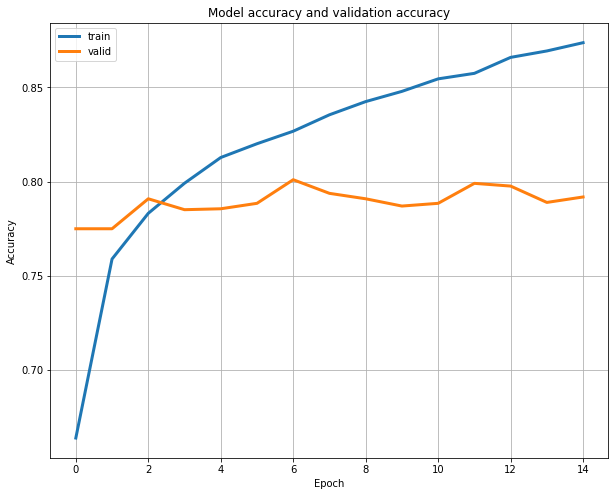

In [ ]:
## plot the accuracy history for train and validation dataset
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(10,8))
plt.grid()
plt.plot(acc, linewidth=3 , label="train")
plt.plot(val_acc, linewidth=3 , label="valid")
plt.legend(['train','valid'], loc='upper left')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Model accuracy and validation accuracy')
plt.show()

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/gdrive/MyDrive/mymodel/InceptionV3_Model.hdf5')

In [88]:
test_data = np.load(open('/content/gdrive/MyDrive/Bottlenecks/InceptV3_bottleneck_features_test.npy', 'rb'))
test_targets = test_generator.classes

In [89]:
InceptV3_predictions = [np.argmax(InceptionV3_model.predict(np.expand_dims(feature, axis=0))) for feature in test_data]
sum(InceptV3_predictions == test_targets)/test_targets.shape[0]

0.791308500477555

# CNN-XGBOOST Model
####We will take the features of our Inception_V3_Model from the last Dense layer called `My_Dense` and feed them into an XGBoost Classifier.<br>
####We will try different hyperparameters in order to tune our model and see if we can yield an out of sample accuracy above 80%.

In [68]:
from keras.models import Model
layer_name='My_Dense'

intermediate_layer_model = Model(inputs=InceptionV3_model.input,
                                 outputs=InceptionV3_model.get_layer(layer_name).output)

intermediate_layer_model.summary()

intermediate_output = intermediate_layer_model.predict(train_data) 

valid_output= intermediate_layer_model.predict(valid_data) 

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1_input (InputLayer  [(None, 2048)]           0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 batch_normalization_94 (Bat  (None, 1024)             4096      
 chNormalization)                                                
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 My_Dense (Dense)            (None, 128)               131200

In [74]:
from xgboost import XGBClassifier

maxDepth=[15]
estim= [100]
lr = [0.100]



for md in maxDepth:
  for est in estim:
    for learn in lr:
      xgbmodel = XGBClassifier(max_depth= md ,
                         learning_rate=learn,
                         n_estimator=est,
                         colsample_bytree = 0.5,
                         reg_alpha=0, reg_lambda=1,
                         objective='multi:softprob',
                         tree_method = "hist", 
                         num_class= 120, verbose = 1)
      
      xgbhistory = xgbmodel.fit(intermediate_output, train_targets,verbose = True,)

      ypr = xgbmodel.predict(valid_output)

      print(sum(ypr == valid_targets)/valid_targets.shape[0])



0.7759036144578313


In [90]:
test_output= intermediate_layer_model.predict(test_data) 

yprTest = xgbhistory.predict(test_output)

print(sum(yprTest == test_targets)/test_targets.shape[0])

0.7870105062082139


In [162]:
xgbmodel.save_model("/content/gdrive/MyDrive/mymodel/XGBOOOST_Model.json")

# Confusion Matrix on The Predictions

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score , recall_score, precision_score, accuracy_score

#Generate predictions with the model using our X values

#Get the confusion matrix
cf_matrix = confusion_matrix(test_targets, InceptV3_predictions)
print(cf_matrix)


[[13  0  0 ...  0  0  0]
 [ 0 12  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ...  9  0  0]
 [ 0  0  0 ...  0 13  1]
 [ 0  0  0 ...  0  0 21]]


In [138]:
miss_classification_rate = []
mcl = 0

for i in range(120):
  Row_sum = cf.loc[i].sum() #Total images classified for the breed in iteration
  mcl = 0                   #Make it zero again for the next breed iteration
  for j in range(120):
    if i != j :
      mcl += cf.loc[i,j] #Total images miss classified for the breed in iteration
      mcl_rate =mcl/Row_sum           # Miss classification rate for the breed in iteration
  miss_classification_rate.append([mcl_rate, i ]) 


In [146]:
sorted(miss_classification_rate)[110:120]

[[0.46153846153846156, 112],
 [0.5, 80],
 [0.5238095238095238, 8],
 [0.5625, 114],
 [0.5714285714285714, 60],
 [0.5789473684210527, 50],
 [0.5882352941176471, 53],
 [0.6666666666666666, 99],
 [0.7647058823529411, 97],
 [0.8181818181818182, 15]]

In [140]:
cf = pd.DataFrame(data = cf_matrix)
cf

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,13,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,12,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,24,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,0,1,0,10,2,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,1,0,15,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,10,0,0,0,0
116,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,17,0,0,0
117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,9,0,0
118,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,13,1


In [145]:
F1 = f1_score(test_targets, InceptV3_predictions,average="macro")
Recall = recall_score(test_targets, InceptV3_predictions,average="macro")
Precision = precision_score(test_targets, InceptV3_predictions,average="macro")
Accuracy = accuracy_score(test_targets, InceptV3_predictions)

In [128]:
print(F1)
print(Recall)
print(Precision)
print(Accuracy)

0.7809701194481202
0.7873283040894447
0.7956354120596179
0.791308500477555


#Confusion Matrix HeatMap Plot
####We can see that most of our Predictions fall on the Diagonal Line which was the result we wanted.

In [126]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(150, 150))

sns.heatmap(cf_matrix, annot=True, annot_kws={"size": 45}, ax=ax,linewidths = 0.5, linecolor = 'red')

Output hidden; open in https://colab.research.google.com to view.

# Final Pipeline
####Here we will create functions to read an image process it call our model and try to identify it.

In [200]:
def MakeTensor(img_path):
    IMG_SIZE = 224
    img_array = cv2.imread(img_path ,cv2.IMREAD_COLOR)
    img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
    img_array_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) # resize image as IMG_SIZE X IMG_SIZE pixels X (1 for grayscale or 3 for color)
    Tensor = np.array(img_array_resized).reshape(-1, IMG_SIZE , IMG_SIZE,3)
    Tensor = Tensor/255 #Rescale the Tensor
    return Tensor

In [201]:
def Extract_Predict_InceptionV3(img_path):
  from tensorflow import keras
  from keras.applications import inception_v3
  InceptionV3_model = keras.models.load_model('/content/gdrive/MyDrive/mymodel/InceptionV3_Model.hdf5')
  feature = tf.keras.applications.inception_v3.InceptionV3(weights='imagenet', include_top=False, pooling='avg').predict(MakeTensor(img_path))
  prediction = InceptionV3_model.predict(feature)
  return dog_names[np.argmax(prediction)]


In [206]:
def Image_Display(img_path):
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = plt.imshow(image)
    return image

In [212]:
def Breed_prediction(img_path):
    Image_Display(img_path)
    prediction = Extract_Predict_InceptionV3(img_path)
    if dog_detector(img_path) == True:
        print('There is a dog in the picture')
        return print('and it is a {}'.format(prediction))
    else:
        return print('I cannot see a dog in this picture please take another one')

There is a dog in the picture
and it is a n02093428-American_Staffordshire_terrier


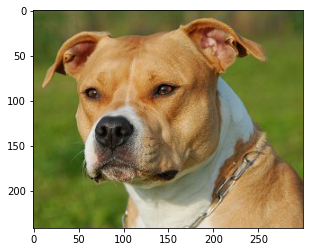

In [213]:
Breed_prediction('/content/gdrive/MyDrive/Test Images/American_staffordshire_terrier_00540.jpg')

There is a dog in the picture
and it is a n02104029-kuvasz


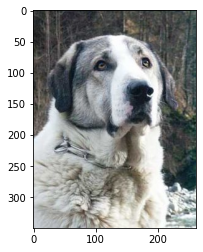

In [216]:
Breed_prediction('/content/gdrive/MyDrive/Test Images/Anatolian_shepherd_dog_00669.jpg')

There is a dog in the picture
and it is a n02110806-basenji


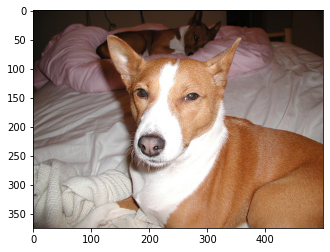

In [217]:
Breed_prediction('/content/gdrive/MyDrive/Test Images/Basenji_00949.jpg')

There is a dog in the picture
and it is a n02110627-affenpinscher


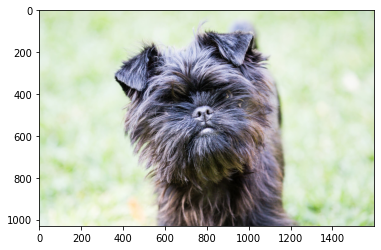

In [220]:
Breed_prediction('/content/gdrive/MyDrive/Test Images/Afenpincher.jpg')

There is a dog in the picture
and it is a n02106662-German_shepherd


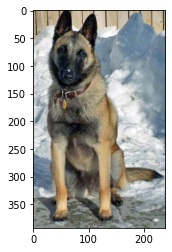

In [218]:
Breed_prediction('/content/gdrive/MyDrive/Test Images/Belgian_malinois_01441.jpg')

I cannot see a dog in this picture please take another one


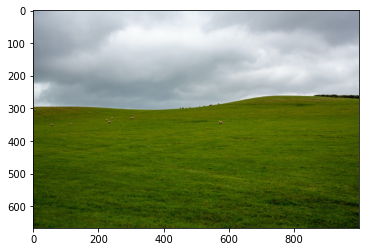

In [230]:
Breed_prediction('/content/gdrive/MyDrive/Test Images/photo-1584623572201-d0385667e46d.jpg')